In [60]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (AveragePooling2D, Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D) 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.python.keras import backend as k

In [3]:
CAPTCHA_DIR=os.path.join("data","data-new")
DIGITS_DIR=os.path.join("data","captcha-digits")

In [4]:
def loadData():
    x = []
    y = []
    for i in os.scandir(DIGITS_DIR):
        if i.is_dir():
            print("Processing for digit: ",i.name)
            for j in os.scandir(i.path):
                #print(j.name)
                img = cv2.imread(j.path,0)
#                 cv2.imshow("img", img)
#                 cv2.waitKey(1)
#                 img = np.reshape(img, (20*20))
                x.append(img)
#                 x.append(np.reshape(img, (length, width, -1)))
                label = i.name
                y.append(int(label))
    x = np.array(x)
    y = np.array(y)
#     cv2.destroyAllWindows()
    return x,y
        
X,Y = loadData()

Processing for digit:  0
Processing for digit:  1
Processing for digit:  2
Processing for digit:  3
Processing for digit:  4
Processing for digit:  5
Processing for digit:  6
Processing for digit:  7
Processing for digit:  8
Processing for digit:  9


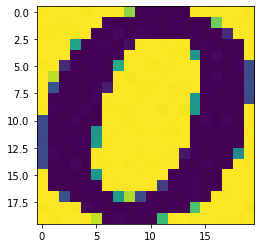

In [6]:
plt.imshow(X[210])

In [7]:
print(X.shape,Y.shape)

(2180, 20, 20) (2180,)


In [8]:
# Flatten the images
image_vector_size = 20*20
X = X.reshape(X.shape[0], image_vector_size)
X.shape

(2180, 400)

In [10]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
yEnc = to_categorical(Y, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", yEnc[512])

First 5 training lables as one-hot encoded vectors:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,yEnc)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1635, 400), (545, 400), (1635, 10), (545, 10))

In [12]:
input_shape = (400, ) #20*20
num_classes = 10 # ten unique digits

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model = Sequential([
    Dense(units=800, activation='sigmoid', input_shape=input_shape),
    Dense(units=800, activation='sigmoid', input_shape=input_shape),
    Dense(units=200, activation='sigmoid', input_shape=input_shape),
    Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 1,123,810
Trainable params: 1,123,810
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=500, epochs=30, verbose=True)

Train on 1635 samples
Epoch 1/30
1635/1635 [==============================] - 1s 382us/sample - loss: 0.0040 - accuracy: 0.9804
Epoch 2/30
1635/1635 [==============================] - 0s 126us/sample - loss: 0.0022 - accuracy: 0.9859
Epoch 3/30
1635/1635 [==============================] - 0s 129us/sample - loss: 0.0023 - accuracy: 0.9853
Epoch 4/30
1635/1635 [==============================] - 0s 135us/sample - loss: 0.0015 - accuracy: 0.9908
Epoch 5/30
1635/1635 [==============================] - 0s 144us/sample - loss: 0.0015 - accuracy: 0.9914
Epoch 6/30
1635/1635 [==============================] - 0s 142us/sample - loss: 6.3207e-04 - accuracy: 0.9963
Epoch 7/30
1635/1635 [==============================] - 0s 133us/sample - loss: 8.3115e-04 - accuracy: 0.9963
Epoch 8/30
1635/1635 [==============================] - 0s 136us/sample - loss: 5.3047e-04 - accuracy: 0.9976
Epoch 9/30
1635/1635 [==============================] - 0s 138us/sample - loss: 9.2832e-04 - accuracy: 0.9957
Epoch 10

In [23]:
#Evaluating over Training Data
loss, accuracy  = model.evaluate(xtest, ytest, verbose=False)
loss ,accuracy

(0.0035741580633856162, 0.9779816)

## Evaluating single image

In [24]:
from processimage import processImage

In [61]:
imageIndex = 100
CAPTCHA_DIR = os.path.join("data","data-new")
data = pd.read_csv("CAP01.csv",dtype={'value': object})
imagepath = os.path.join(CAPTCHA_DIR, data.iloc[:,0][imageIndex])
img = cv2.imread(imagepath)
rois = processImage(img)
if(rois is None):
    print("Problem Img", data.iloc[:,0][imageIndex])
prediction = 0
for i in range(len(rois)):
    tmp = rois[i].reshape(1,image_vector_size)
    preds = model.predict(tmp)
    round_preds = np.around(preds)
    prediction = (10*prediction) + np.argmax(round_preds, axis=None, out=None)
print(prediction)
Image.open(imagepath)

85529
